<a href="https://colab.research.google.com/github/LearnByDoing2024/Youtube/blob/main/LLAMA3_2_TESTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1B

PYTHON CODE FOR SNAKE GAME

In [1]:
def play_game():
    # Initialize game state and player position
    board = [[0]*10 for _ in range(6)]
    player_pos = 1
    snake_pos = (0,0)

    while True:
        print_board(board)  # Display current board

        # Move the snake based on user input
        direction = input("Enter 'U' to move up, 'D' to move down, 'L' to move left, 'R' to move right: ")

        if direction.lower() == "u":
            new_pos = (player_pos[0], player_pos[1] - 2)
            # Check if the new position is valid
            if board[new_pos[0]][new_pos[1]] < snake_pos[1]:
                snake_pos = new_pos
            else:
                print("You cannot move that way.")
        elif direction.lower() == "d":
            new_pos = (player_pos[0] + 2, player_pos[1])
            if board[new_pos[0]][new_pos[1]] < snake_pos[1]:
                snake_pos = new_pos
            else:
                print("You cannot move that way.")
        elif direction.lower() == "l":
            new_pos = (player_pos[0] - 2, player_pos[1])
            if board[new_pos[0]][new_pos[1]] < snake_pos[1]:
                snake_pos = new_pos
            else:
                print("You cannot move that way.")
        elif direction.lower() == "r":
            new_pos = (player_pos[0] + 2, player_pos[1])
            if board[new_pos[0]][new_pos[1]] < snake_pos[1]:
                snake_pos = new_pos
            else:
                print("You cannot move that way.")

        # Check for game over conditions
        if (
            abs(snake_pos[0] - (player_pos[0] + 2)) <= 1 and
            abs(snake_pos[1] - player_pos[1]) <= 1
        ):
            print("Congratulations, you won!")
            break

        # Update the board with the snake's new position
        board[player_pos[0]][player_pos[1]] = snake_pos[0]
        board[player_pos[0]][player_pos[1] + 2] = snake_pos[1]

        player_pos = snake_pos

play_game()

NameError: name 'print_board' is not defined

USE Y FINANCE TO GET AAPL 1MONTH PRICE DATA AND SHOW IN GRAPH USING PYTHONG

In [2]:
import yfinance as yf

def get_aapl_price_data():
    # Get the latest price data of AAPL
    aapl = yf.Ticker("AAPL")

    # Get the current market value
    aapl_market_value = aapl.info["currentPrice"]

    return aapl_market_value

# Call the function to get the current price data
price_data = get_aapl_price_data()

# Print the price data in a readable format
print(f"The current market value of AAPL is: ${price_data:.2f}")

The current market value of AAPL is: $226.37


USE PYTHON TO SCRAPE WIKIPEDIA SP500 PAGE STOCK LIST

In [4]:
import requests

def scrape_wikibooks_sp500_page():
    # Send a GET request to the Wikipedia page for the S&P 500 index
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

    response = requests.get(url)

    # Parse the HTML content of the webpage using BeautifulSoup
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all company names on the page
    companies = soup.find_all('tr', class_='wikitable sortable')

    # Extract the list of S&P 500 companies and their corresponding market values
    sp500_companies = []
    for company in companies:
        name = company.find('td', class_='wikitable sortable').text.strip()
        try:
            value = float(company.find('td', class_='wikitable sortable').find_next_sibling().text.strip())
            sp500_companies.append((name, value))
        except AttributeError:
            continue

    return sp500_companies

# Call the function to scrape the S&P 500 page
sp500_data = scrape_wikibooks_sp500_page()

# Print the list of companies and their corresponding market values
for company, value in sp500_data:
    print(f"{company}: ${value:.2f}")

3B

PYTHON CODE FOR SNAKE GAME

In [8]:
import random
import os

# Set up constants
WIDTH = 20
HEIGHT = 20
SNAKE_SIZE = 3
APPLE_SIZE = 1
SCORE_FONT = "arial.ttf"
FPS = 10

class SnakeGame:
    def __init__(self):
        self.snake_pos = [(WIDTH // 2, HEIGHT // 2) for _ in range(SNAKE_SIZE)]
        self.snake_dir = "RIGHT"
        self.apple_pos = self.generate_apple()
        self.score = 0
        self.display = ""

    def generate_apple(self):
        while True:
            x = random.randint(1, WIDTH - APPLE_SIZE)
            y = random.randint(1, HEIGHT - APPLE_SIZE)
            if (x, y) not in self.snake_pos:
                return (x, y)

    def update_score(self):
        self.score += 1
        self.display += f"Score: {self.score}\n"

    def update_snake_pos(self):
        x, y = self.snake_pos[-1]
        if self.snake_dir == "RIGHT":
            self.snake_pos.append((x + 1, y))
        elif self.snake_dir == "LEFT":
            self.snake_pos.append((x - 1, y))
        elif self.snake_dir == "UP":
            self.snake_pos.append((x, y - 1))
        elif self.snake_dir == "DOWN":
            self.snake_pos.append((x, y + 1))

    def check_collisions(self):
        head_x, head_y = self.snake_pos[-1]
        if (head_x, head_y) in self.snake_pos[:-1]:
            return True
        elif head_x < 0 or head_x >= WIDTH or head_y < 0 or head_y >= HEIGHT:
            return True
        return False

    def update_apple(self):
        x, y = self.apple_pos
        if (x, y) in self.snake_pos[:-1]:
            self.update_score()
            self.generate_apple()
        elif (x, y) == (self.snake_pos[-1]):
            self.update_score()

    def display_game(self):
        self.display = ""
        for row in range(HEIGHT):
            line = ""
            for col in range(WIDTH):
                if (col, row) in [pos for pos in self.snake_pos]:
                    line += "# "
                elif (col, row) == self.apple_pos:
                    line += "O "
                else:
                    line += ". "
            self.display += line + "\n"
        print(self.display)

    def game_loop(self):
        while True:
            os.system("cls" if os.name == "nt" else "clear")
            self.update_snake_pos()
            self.check_collisions()
            self.update_apple()
            self.display_game()
            key = input("Enter direction (W, A, S, D): ")
            if key.upper() == "W":
                if self.snake_dir != "DOWN":
                    self.snake_dir = "UP"
            elif key.upper() == "A":
                if self.snake_dir != "RIGHT":
                    self.snake_dir = "LEFT"
            elif key.upper() == "S":
                if self.snake_dir != "UP":
                    self.snake_dir = "DOWN"
            elif key.upper() == "D":
                if self.snake_dir != "LEFT":
                    self.snake_dir = "RIGHT"

game = SnakeGame()
game.game_loop()

. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . # # . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . O . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 

Enter direction (W, A, S, D): W
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . 

KeyboardInterrupt: Interrupted by user

USE Y FINANCE TO GET AAPL 1MONTH PRICE DATA AND SHOW IN GRAPH USING PYTHON

[*********************100%***********************]  1 of 1 completed


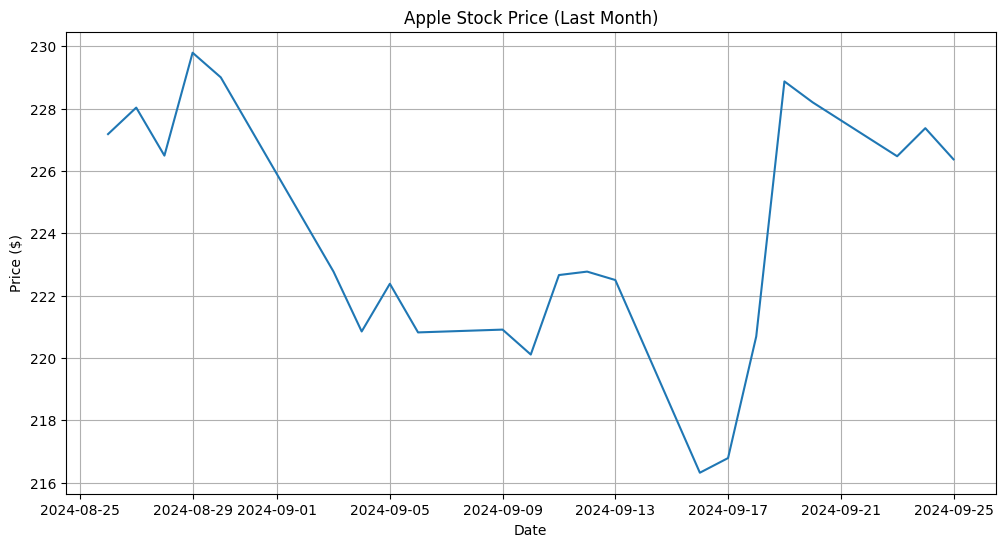

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Get Apple stock data for last month
data = yf.download('AAPL', period='1mo')

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Apple Stock Price (Last Month)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [10]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with stock data
table = soup.find('table', {'class': 'sorted_table'})

# Extract the column headers
headers = [th.text.strip() for th in table.find('tr').find_all('th')]

# Initialize lists to store the data
data = []

# Iterate through each row in the table
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])

# Print the extracted data
for i, header in enumerate(headers):
    print(f"{header}: {data[i][0]}")

# Extract and print the ticker symbols (last column)
print("\nTicker Symbols:")
for ticker in [row[-1] for row in data]:
    print(ticker)

AttributeError: 'NoneType' object has no attribute 'find'